In [65]:
__author__ = "Munir Makani"

## A Whale off the Port(folio)
# Answers

In [66]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_datareader import data
from googlefinance.get import get_data
import pandas_datareader.data as wb
import seaborn as sns
import yfinance as yf

%matplotlib inline

In [67]:
# Set paths

whale_path = Path('whale_returns.csv')
aapl_path = Path('aapl_historical.csv')
algo_path = Path('algo_returns.csv')
cost_path = Path('cost_historical.csv')
goog_path = Path('goog_historical.csv')
sp500_path = Path('sp500_history.csv')

In [68]:
# Read in the CSV as a DataFrame  & set the date as the index to the DataFrame

whale_returns = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

aapl_historical = pd.read_csv(aapl_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

algo_returns = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

cost_historical = pd.read_csv(cost_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

goog_historical = pd.read_csv(goog_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

sp500_history = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [69]:
## Performance Analysis

# Whale Returns

# Check for null values
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [70]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [71]:
# Drop nulls
whale_returns.dropna(inplace=True)

# Confirm null values removed
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [72]:
# Algo Returns

# Check for null values
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [73]:
# Drop nulls
algo_returns.dropna(inplace=True)

# Confirm null values removed
algo_returns.isnull().sum()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [74]:
# SP500 Returns

# Remove "$" sign from values in "Close" column and convert data type from "object" to "float"
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "").astype("float")

# Check Data Types
sp500_history.dtypes

Close    float64
dtype: object

In [75]:
# Sort index in ascending order
sp500_history.sort_index(inplace=True)

sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [76]:
# Calculate Daily Returns of sp500

sp500_dr = sp500_history.pct_change()
sp500_dr.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [77]:
# Drop nulls
sp500_dr.dropna(inplace=True)

# Preview DataFrame
sp500_dr.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [78]:
# Rename Column

sp500_dr.columns = ["S&P 500"]
sp500_dr.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [79]:


# Concatenate all Daily Returns DataFrames into a single DataFrame

daily_returns= pd.concat([whale_returns, algo_returns, sp500_dr], axis='columns', join='inner')
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


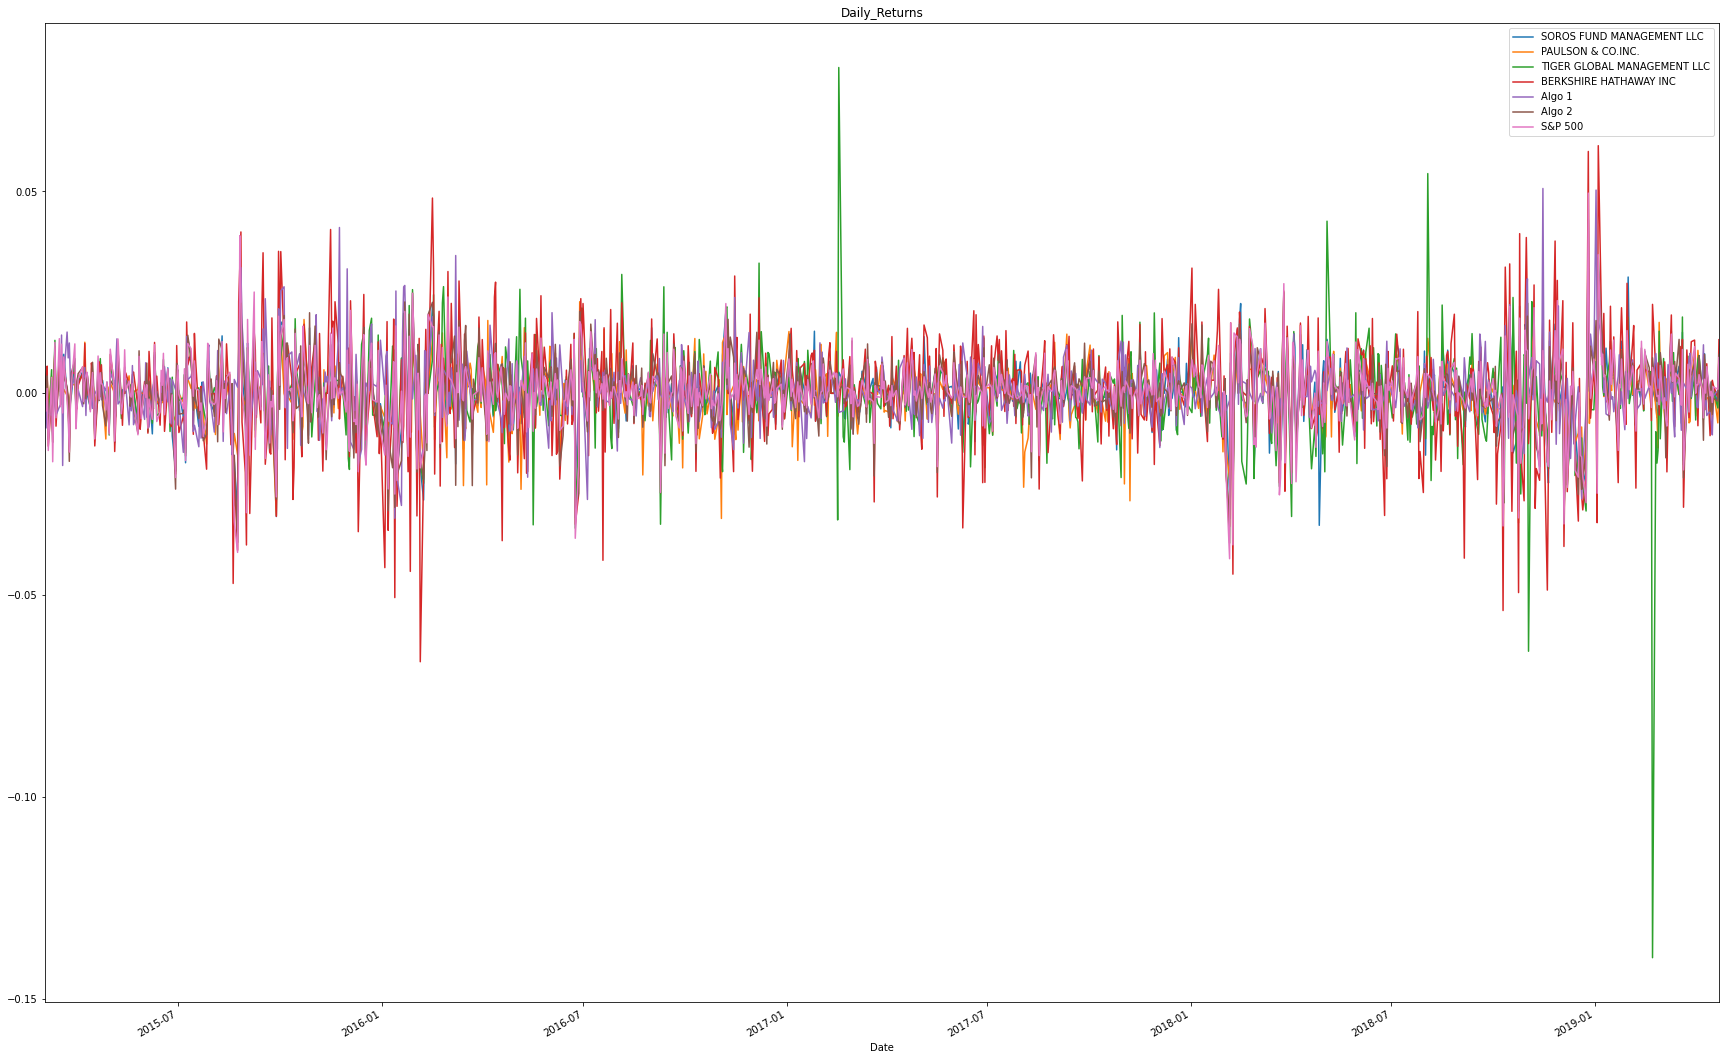

In [80]:
# 1. Plot Daily Returns of all portfolios & sp500
daily_returns.plot(figsize=(30,20), title="Daily_Returns")
plt.margins(x=0)

In [81]:
print("Commentry: " "From the above graph, it can be inferred that sp500, being the market portfolio is lease volatile compared to particular portfolios. It appears that Tiger Global Management LLC portfolio is the most volatile compared to other portfolios and sp500 and many times outperform and underperform sp500. On the other hand, Berkshire Hathaway portfolio is the second most volatile portfolio that at times outperform and underperform sp500. Algo 1 appears to be least volatile compard with other portfolios.") 

Commentry: From the above graph, it can be inferred that sp500, being the market portfolio is lease volatile compared to particular portfolios. It appears that Tiger Global Management LLC portfolio is the most volatile compared to other portfolios and sp500 and many times outperform and underperform sp500. On the other hand, Berkshire Hathaway portfolio is the second most volatile portfolio that at times outperform and underperform sp500. Algo 1 appears to be least volatile compard with other portfolios.


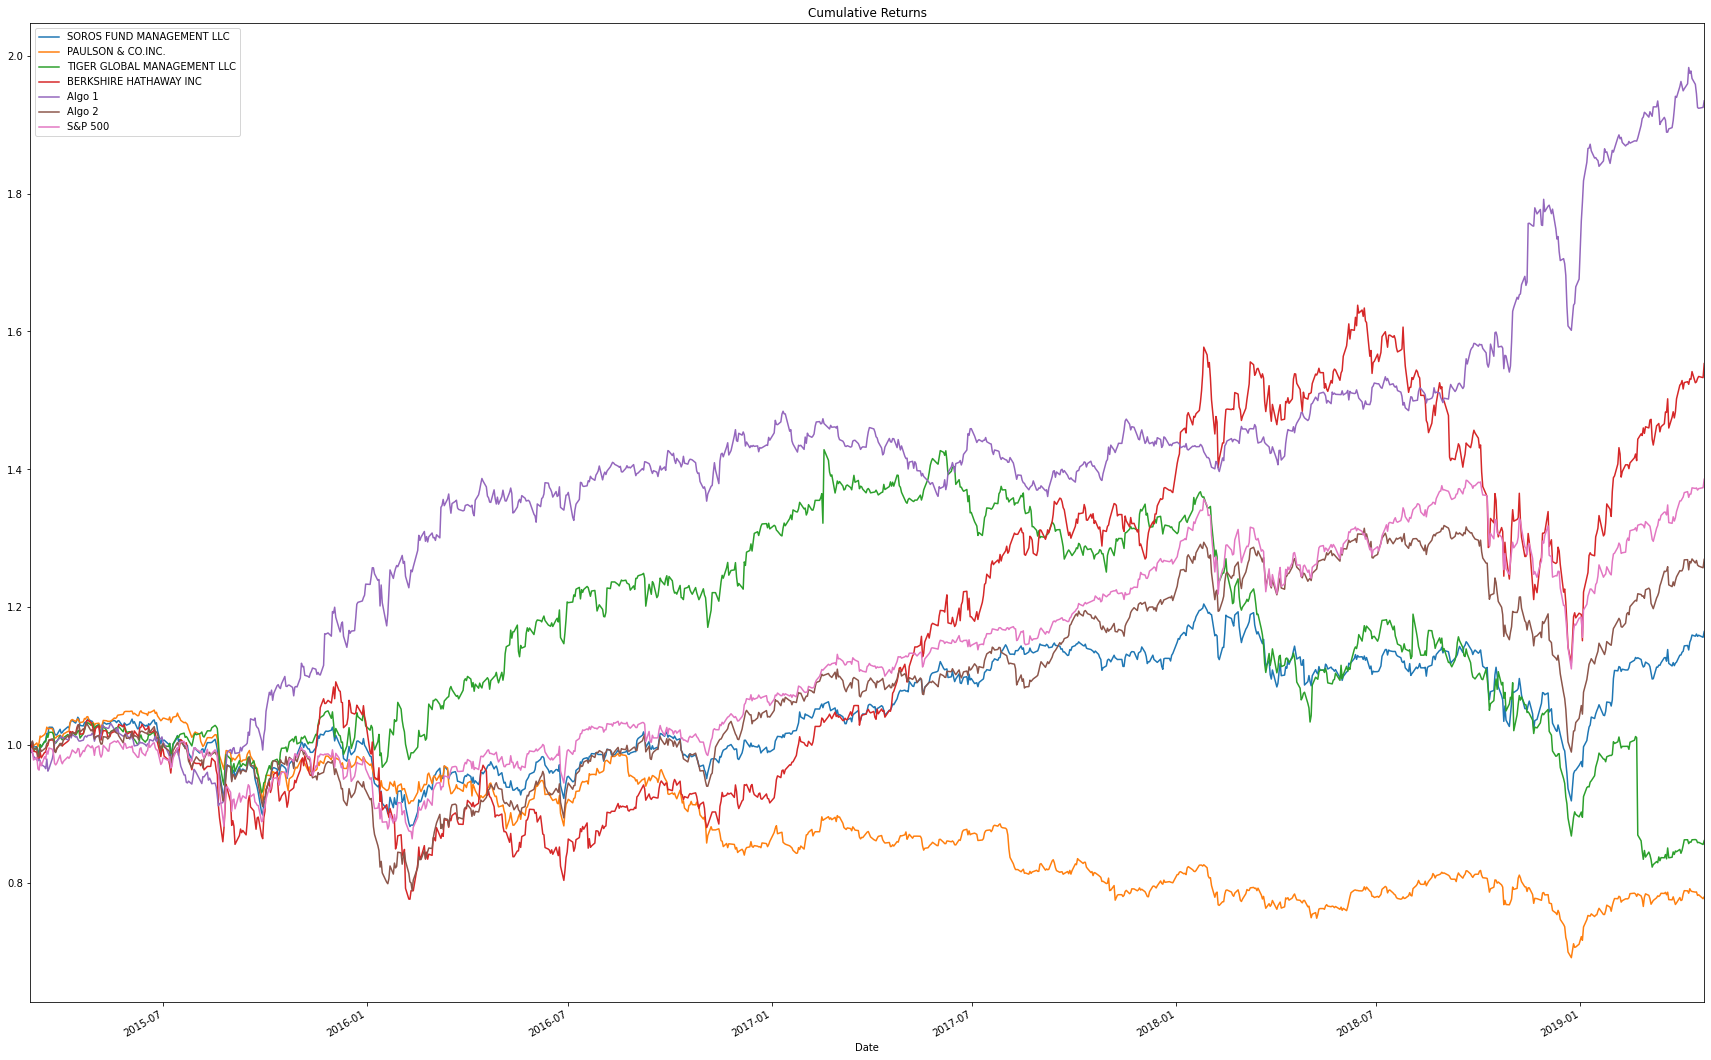

In [82]:
# 2. Plot Cummulative Returns of all portfolios & sp500
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize = (30,20), title="Cumulative Returns")
plt.margins(x=0)

<AxesSubplot:title={'center':'Portfolio Risk'}>

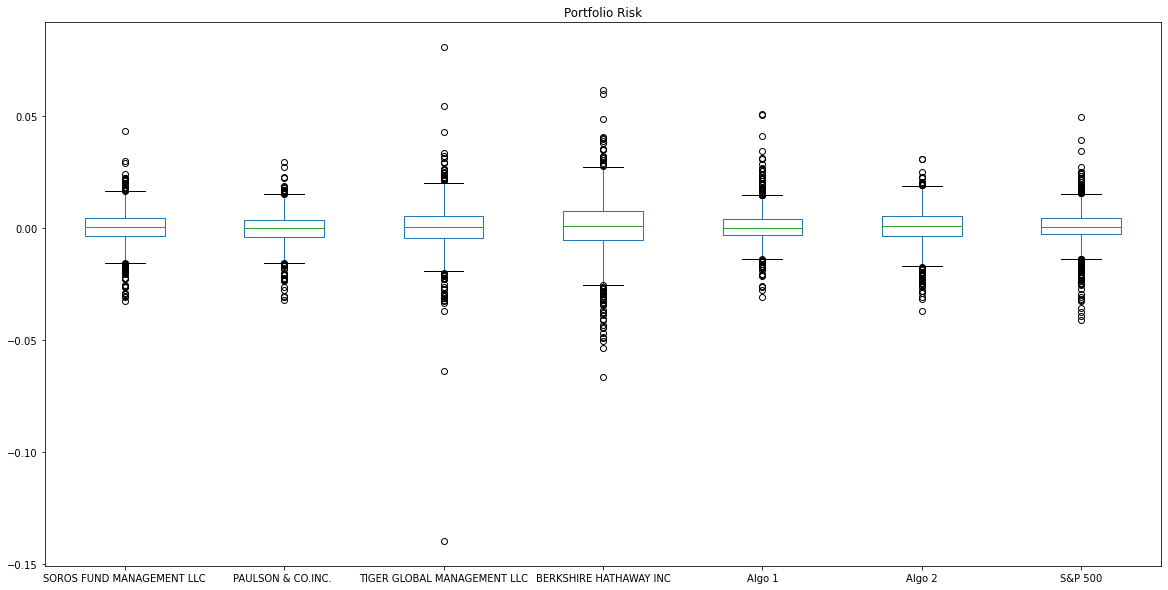

In [83]:
## Risk Analysis

# 1. Plot box to show risk
daily_returns.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")

In [84]:
print("Commentry: " "It appears that largest outliers are in the Tiger Global Management Portfolio contrasting to lowest spread in Paulson Portfolio. Interstingly, Algo 1 has lowest below zero return spread and highest above zero return spread. Berkshire Portfolio has largest the spread among portfolios") 


Commentry: It appears that largest outliers are in the Tiger Global Management Portfolio contrasting to lowest spread in Paulson Portfolio. Interstingly, Algo 1 has lowest below zero return spread and highest above zero return spread. Berkshire Portfolio has largest the spread among portfolios


In [85]:
# Standard Deviations

# 2. Calculate daily standard deviation for each portfolio
daily_std = pd.DataFrame(daily_returns.std()).rename(columns = {0:"Std"})
daily_std

,Std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [86]:
# 4. Calculate  annualized standard deviation (252 trading days) for each portfolio
annualized_std = daily_std * np.sqrt(252)
annualized_std

,Std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


In [87]:
# 3. Portfolios riskier than the S&P 500
higher_std = annualized_std[annualized_std["Std"] > annualized_std.loc["S&P 500", "Std"]]
higher_std

,Std
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077


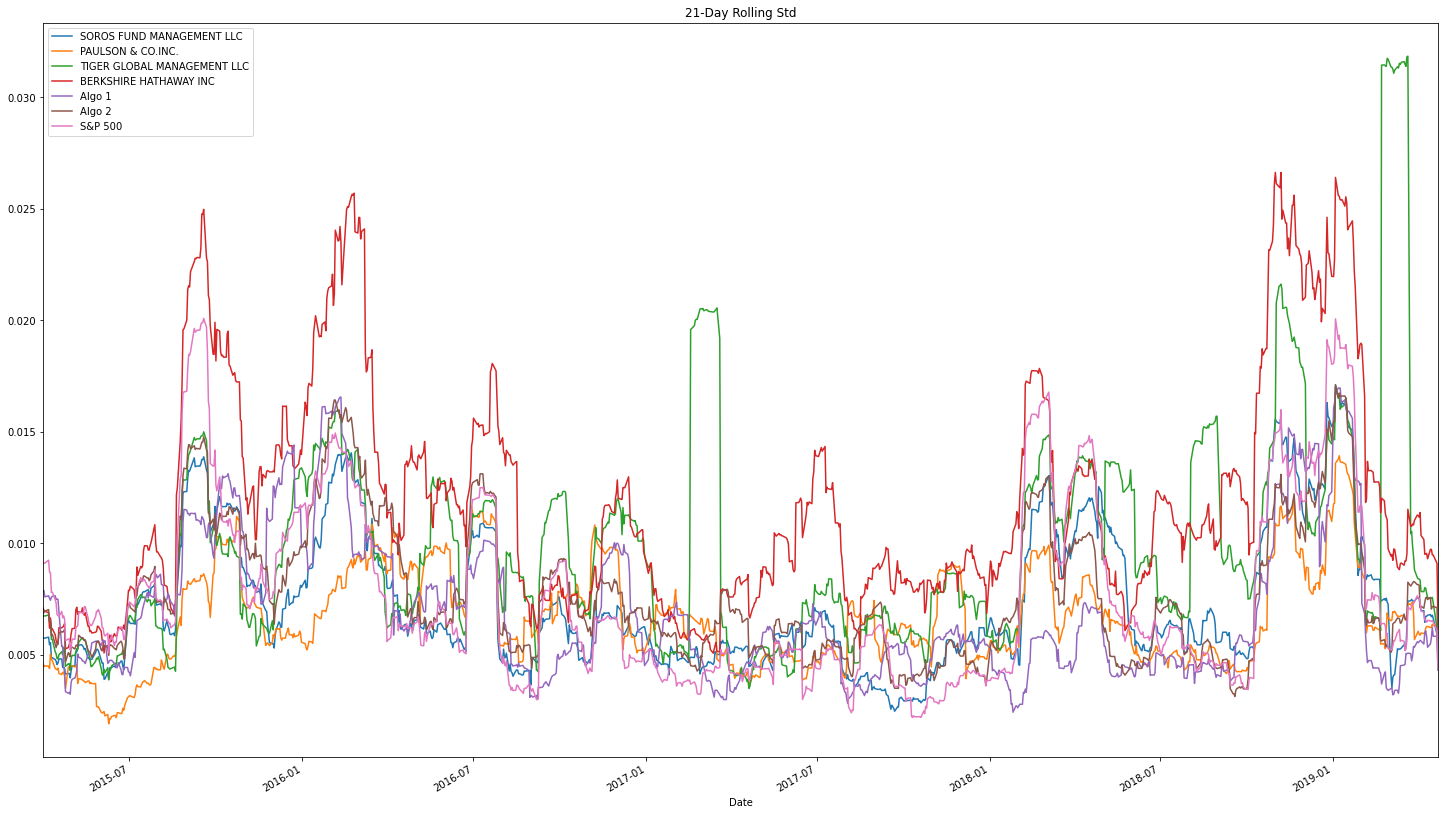

In [88]:
## Roling Statistics

# 1. Calculate and plot of rolling standard deviations for all portfolios using a 21-day trading window

rolling_std = daily_returns.rolling(window=21).std()
rolling_std.plot(figsize = (25,15), title="21-Day Rolling Std")
plt.margins(x=0)

In [89]:
# Correlation table
correlation = daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [90]:
print("Commentry: " "It appears that Algo 2 portfolio with 0.859 correlation with sp500 is the highest correlated portfolio") 


Commentry: It appears that Algo 2 portfolio with 0.859 correlation with sp500 is the highest correlated portfolio


<AxesSubplot:>

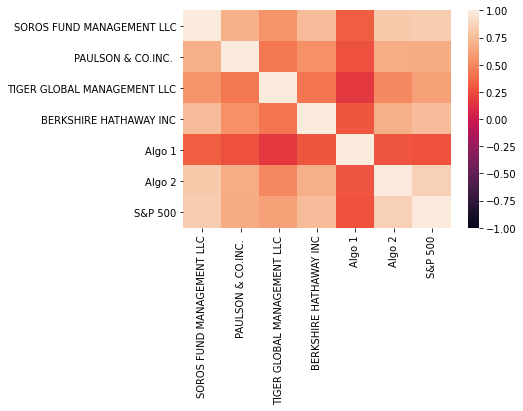

In [91]:
# 2. Correlation plot
sns.heatmap(correlation, vmin=-1, vmax=1,)

In [92]:
# 3. Calculate and plot of 60-day rolling beta between Algo 2 portfolio and the S&P 500

# Rolling Covariance

rolling_cov = daily_returns['Algo 2'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_cov

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000038
2019-04-17    0.000034
2019-04-18    0.000035
2019-04-22    0.000035
2019-04-23    0.000035
Length: 1043, dtype: float64

In [93]:
# Rolling Variance

rolling_var = daily_returns['S&P 500'].rolling(window=60).var()
rolling_var

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

In [94]:
# Rolling Beta of Algo 2

rolling_beta = rolling_cov /rolling_var 
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.910622
2019-04-17    0.923897
2019-04-18    0.925305
2019-04-22    0.926647
2019-04-23    0.922600
Length: 1043, dtype: float64

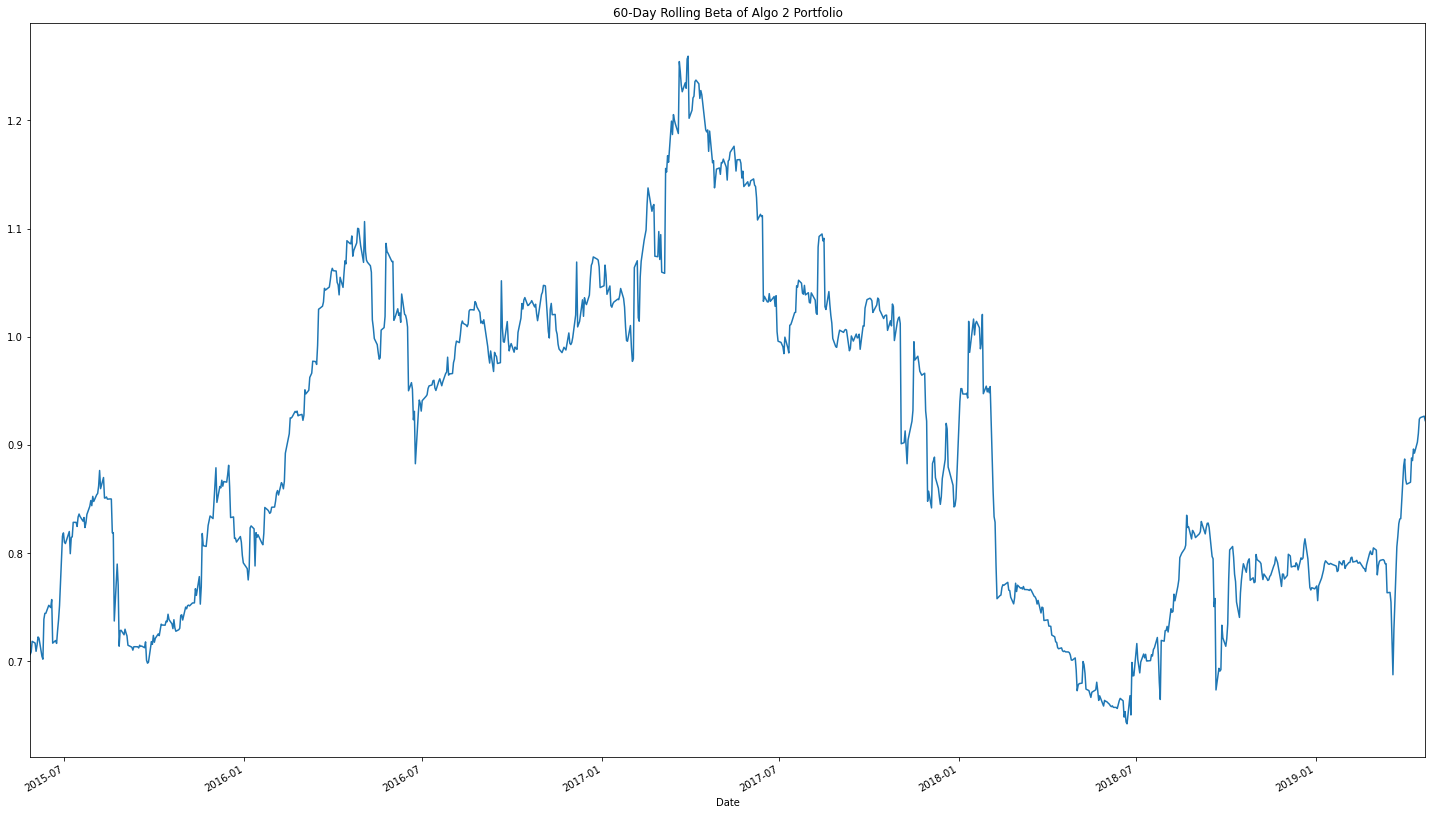

In [95]:
rolling_beta.plot(figsize=(25, 15), title='60-Day Rolling Beta of Algo 2 Portfolio')
plt.margins(x=0)

In [96]:
# Rolling Statistics Challange

# Exponentially weighted moving average using 21-days rolling window 
rolling_ewm = daily_returns.ewm(span = 21, adjust = False).mean()
rolling_ewm


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.000948,-0.004233,-0.000681,-0.005589,-0.002546,-0.000644,-0.004525
2015-03-05,-0.000496,-0.003478,-0.000405,-0.004469,-0.002402,-0.000192,-0.004005
2015-03-06,-0.001170,-0.003486,-0.001139,-0.005253,-0.002634,-0.001216,-0.004929
2015-03-09,-0.001011,-0.002785,-0.000504,-0.004926,-0.002890,-0.000987,-0.004123
...,...,...,...,...,...,...,...
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,0.001544
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,0.001197
2019-04-18,0.001563,0.000003,0.000285,0.001496,-0.000895,0.000507,0.001232


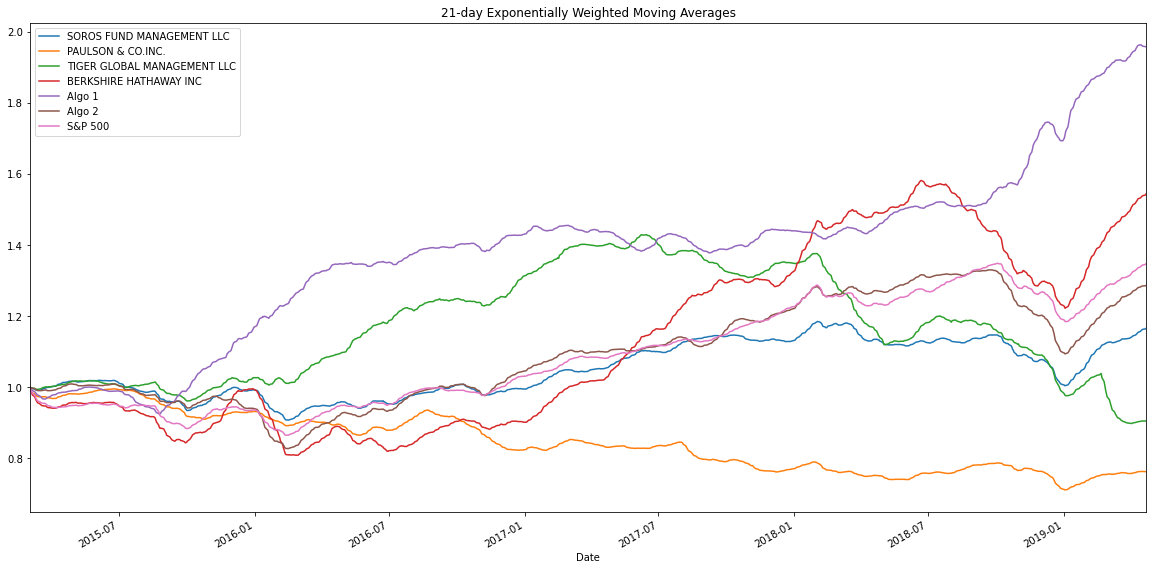

In [97]:
# Plot of exponentially weighted moving average using 21-days rolling window
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-day Exponentially Weighted Moving Averages")
plt.margins(x=0)

In [98]:
# Sharpe Ratios

# 1a. Sharpe Ratios based on daily returns with assumption of risk-free rate to be zero
sr_cp = daily_returns.mean() / (daily_returns.std())
sr_cp 

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
S&P 500                        0.040837
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

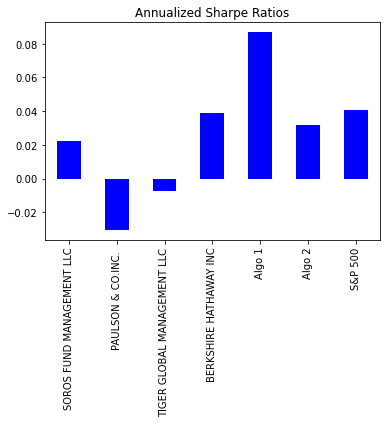

In [99]:
# 1b. Sharpe ratios as a bar plot
sr_cp.plot(kind = "bar", title = "Annualized Sharpe Ratios", color = 'Blue')

In [100]:
# 2. Commentry

print("Commentry: " "Based on Sharpe Ratios analysis, Algo 1 portfolio has out-performed both sp500 and whale Portfolios as well. However, Algo 2 has under-performed sp500 and Berkshire Hathaway compared with Whale Portofolios") 


Commentry: Based on Sharpe Ratios analysis, Algo 1 portfolio has out-performed both sp500 and whale Portfolios as well. However, Algo 2 has under-performed sp500 and Berkshire Hathaway compared with Whale Portofolios


In [101]:
## Custom Portfolio of selected stocks in Tickers

# 1. Available CSV files were used

tickers = ['AAPL', 'GOOG', 'COST']

# 2a. Data from AAPL dataframe created above cleaned with dropping symbol and column rename

aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [102]:
appl = aapl_historical.drop('Symbol', axis=1)
appl.columns = ["AAPL Close"]
appl.index.names = ['Date']
appl

,AAPL Close
Date,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [103]:
# 2b. Data from GOOG dataframe created above cleaned with dropping symbol and column rename

goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [104]:
goog = goog_historical.drop('Symbol', axis=1)
goog.columns = ["GOOG Close"]
goog.index.names = ['Date']
goog

,GOOG Close
Date,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [105]:
# 2c. Data from COST dataframe created above

cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [106]:
cost = cost_historical.drop('Symbol', axis=1)
cost.columns = ["COST Close"]
cost.index.names = ['Date']
cost

,COST Close
Date,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [107]:
# Building My Portfolio and sort index in ascending order
my_portfolio = pd.concat([appl, goog, cost], axis='columns', join='inner')
my_portfolio.sort_index(ascending=True, inplace=True)

my_portfolio

,AAPL Close,GOOG Close,COST Close
Date,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [108]:
# 3. Putting equal weights and calculating weighted returns for my portfolio with drop null
weights = [0.3333, 0.3333, 0.3333]
my_portfolio_r = my_portfolio.pct_change().dot(weights)
my_portfolio_r.dropna(inplace=True)
my_portfolio_r

Date
2018-05-14    0.000015
2018-05-15   -0.010063
2018-05-16    0.009402
2018-05-17   -0.001595
2018-05-18   -0.006060
                ...   
2019-05-03    0.013327
2019-05-06   -0.004557
2019-05-07   -0.018796
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

In [109]:
# 4. My Portfolio is added to Daily Returns DataFrame and rename the column

combined_pr = pd.concat([my_portfolio_r, daily_returns], axis='columns', join='inner')
combined_pr.rename(columns = {0:"My Portfolio"}, inplace = True)

combined_pr

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010063,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009402,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006060,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009291,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [110]:
combined_pr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2018-05-14 to 2019-04-23
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   My Portfolio                 237 non-null    float64
 1   SOROS FUND MANAGEMENT LLC    237 non-null    float64
 2   PAULSON & CO.INC.            237 non-null    float64
 3   TIGER GLOBAL MANAGEMENT LLC  237 non-null    float64
 4   BERKSHIRE HATHAWAY INC       237 non-null    float64
 5   Algo 1                       237 non-null    float64
 6   Algo 2                       237 non-null    float64
 7   S&P 500                      237 non-null    float64
dtypes: float64(8)
memory usage: 16.7 KB


In [111]:
# 5. Risk Analysis on Combined Portfolio Returns

# Daily Standard Deviations

# Calculate daily standard deviation for each portfolio and sort
combined_pr_std = pd.DataFrame(combined_pr.std()).rename(columns = {0:"Std"}).sort_values(by='Std', ascending=False)
combined_pr_std

,Std
BERKSHIRE HATHAWAY INC,0.015569
TIGER GLOBAL MANAGEMENT LLC,0.014648
My Portfolio,0.013322
S&P 500,0.009578
SOROS FUND MANAGEMENT LLC,0.009240
Algo 2,0.008791
Algo 1,0.008423
PAULSON & CO.INC.,0.007353


In [112]:
# 5.1 Annualized Standard Deviations of Combined Potofolios including My Portfolio

# Calculate  annualized standard deviation (237 trading days)
combined_pr_stda = combined_pr_std * np.sqrt(237)
combined_pr_stda.sort_values(by='Std', ascending=False)
combined_pr_stda

,Std
BERKSHIRE HATHAWAY INC,0.239686
TIGER GLOBAL MANAGEMENT LLC,0.225504
My Portfolio,0.205084
S&P 500,0.147459
SOROS FUND MANAGEMENT LLC,0.142243
Algo 2,0.135339
Algo 1,0.129663
PAULSON & CO.INC.,0.113204


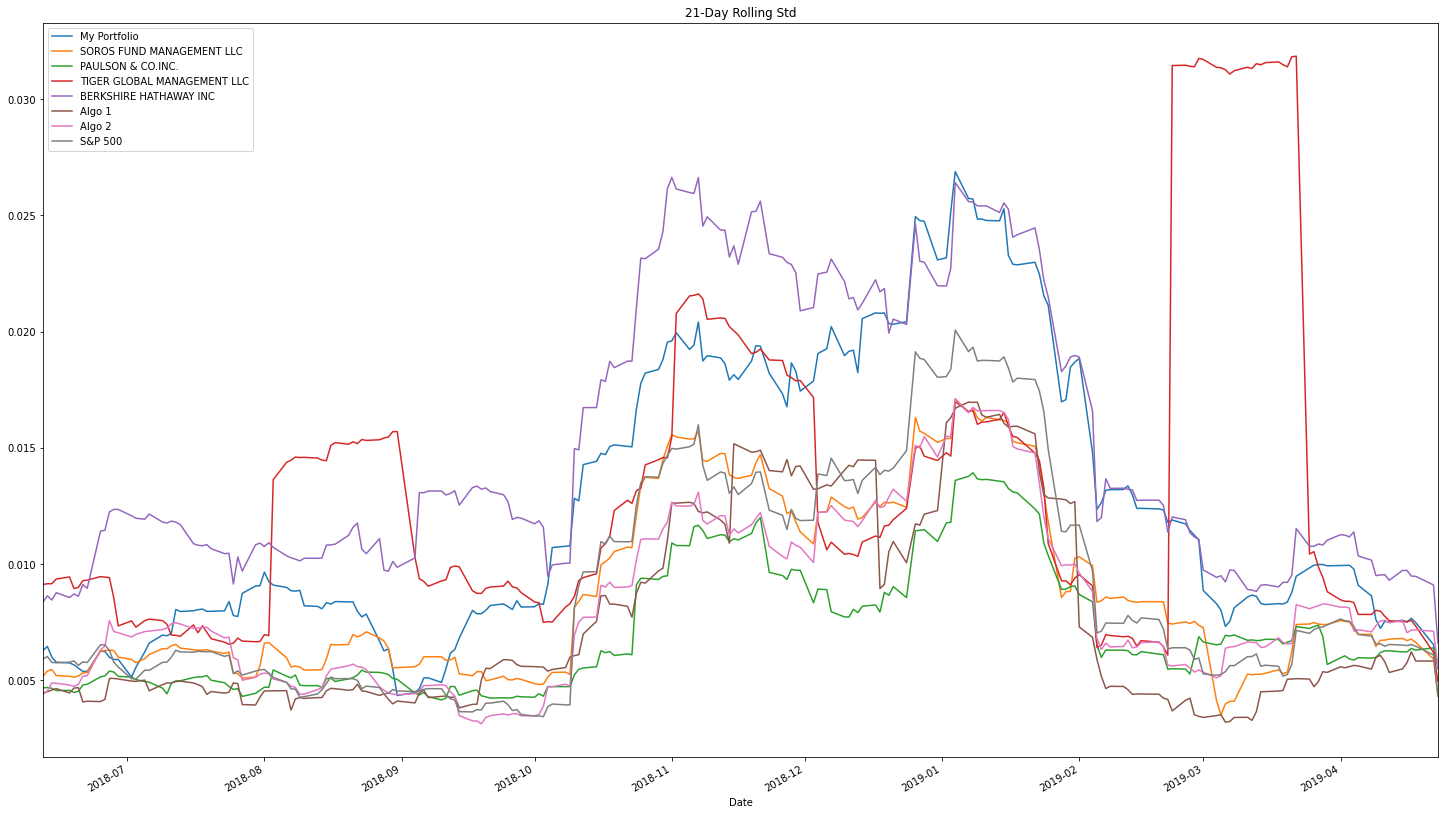

In [113]:
# 5.2 Rolling 21-day std of Combined Portfolios including My Portfolio

combined_pr_stdr= combined_pr.rolling(window=21).std()
combined_pr_stdr.plot(figsize = (25,15), title="21-Day Rolling Std")
plt.margins(x=0)

In [114]:
# 5.3a Correlation table
combined_corr = combined_pr.corr()
combined_corr

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
My Portfolio,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


<AxesSubplot:>

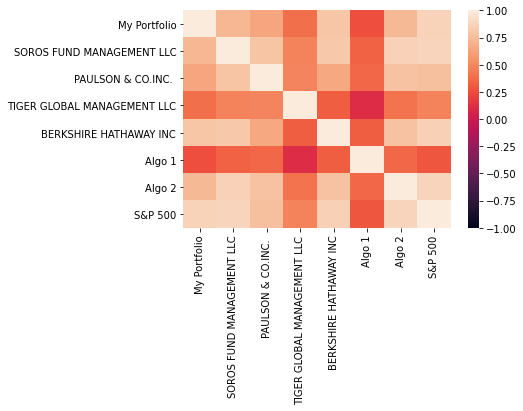

In [115]:
# 5.3b Combined Correlation plot
sns.heatmap(combined_corr, vmin=-1, vmax=1,)

In [116]:
# 5.4 Beta of My Portfolio vs S&P 60 TSX

# SP 60 TSX dataframe

start_date = '2018-05-11'
end_date = '2019-05-09'

sp_tsx60 = data.get_data_yahoo('^GSPTSE', start=start_date, end=end_date)
sp_tsx60

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-11,16030.400391,15975.900391,15998.099609,15983.299805,196733700,15983.299805
2018-05-14,16101.599609,16016.900391,16023.900391,16085.599609,226311000,16085.599609
2018-05-15,16132.099609,16053.299805,16097.799805,16097.799805,224440500,16097.799805
2018-05-16,16120.299805,16067.200195,16105.799805,16108.099609,201996900,16108.099609
2018-05-17,16179.500000,16117.500000,16125.299805,16143.599609,208702800,16143.599609
...,...,...,...,...,...,...
2019-05-03,16496.599609,16430.000000,16467.699219,16494.400391,202157100,16494.400391
2019-05-06,16493.500000,16327.099609,16332.799805,16493.500000,197204000,16493.500000
2019-05-07,16408.500000,16317.900391,16378.000000,16357.799805,248842000,16357.799805


In [117]:
# Data for sp_tsx60 dataframe cleaned
sp_tsx60 = sp_tsx60.drop(['High','Low','Open','Close','Volume'], axis=1)
sp_tsx60

,Adj Close
Date,
2018-05-11,15983.299805
2018-05-14,16085.599609
2018-05-15,16097.799805
2018-05-16,16108.099609
2018-05-17,16143.599609
...,...
2019-05-03,16494.400391
2019-05-06,16493.500000
2019-05-07,16357.799805


In [118]:
# Adj Close column for sp_tsx60 renamed
sp_tsx60.columns = ["SP 60TSX"]
sp_tsx60

,SP 60TSX
Date,
2018-05-11,15983.299805
2018-05-14,16085.599609
2018-05-15,16097.799805
2018-05-16,16108.099609
2018-05-17,16143.599609
...,...
2019-05-03,16494.400391
2019-05-06,16493.500000
2019-05-07,16357.799805


In [119]:
# Daily retunrs of sp_tsx60

sp_tsx60_dr = sp_tsx60.pct_change()
sp_tsx60_dr.head()

,SP 60TSX
Date,
2018-05-11,NaN
2018-05-14,0.006400
2018-05-15,0.000758
2018-05-16,0.000640
2018-05-17,0.002204


In [120]:
# Drop nulls from sp_tsx60_dr dataframe
sp_tsx60_dr.dropna(inplace=True)
sp_tsx60_dr


,SP 60TSX
Date,
2018-05-14,0.006400
2018-05-15,0.000758
2018-05-16,0.000640
2018-05-17,0.002204
2018-05-18,0.001158
...,...
2019-05-03,0.005088
2019-05-06,-0.000055
2019-05-07,-0.008227


In [121]:
# SP 60 TSX returns are added to Combined returns DataFrame 
combined_pr_1 = pd.concat([combined_pr, sp_tsx60_dr], axis='columns', join='inner')

combined_pr_1

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,SP 60TSX
Date,,,,,,,,,
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.006400
2018-05-15,-0.010063,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,0.000758
2018-05-16,0.009402,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.000640
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.002204
2018-05-18,-0.006060,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.001158
...,...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000805
2019-04-17,0.009291,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.002545
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004147


In [122]:
# Calculate and plot of 60-day rolling beta between my portfolio and the SP 60TSX

# Rolling Covariance of My Portfolio and Sp 60TSX

rolling_cov_mp_sp60tsx = combined_pr_1['My Portfolio'].rolling(window=60).cov(combined_pr_1['SP 60TSX'])
rolling_cov_mp_sp60tsx


Date
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    0.000019
2019-04-17    0.000016
2019-04-18    0.000016
2019-04-22    0.000016
2019-04-23    0.000016
Length: 232, dtype: float64

In [123]:
# Rolling Variance of SP 60 TSX

rolling_var_sp60tsx = combined_pr_1['SP 60TSX'].rolling(window=60).var()
rolling_var_sp60tsx



Date
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    0.000016
2019-04-17    0.000015
2019-04-18    0.000015
2019-04-22    0.000015
2019-04-23    0.000015
Name: SP 60TSX, Length: 232, dtype: float64

In [124]:
# Rolling Beta of My Portfolio and plot

rolling_beta_mp = rolling_cov_mp_sp60tsx /rolling_var_sp60tsx 
rolling_beta_mp

Date
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    1.182405
2019-04-17    1.083718
2019-04-18    1.078325
2019-04-22    1.120914
2019-04-23    1.109071
Length: 232, dtype: float64

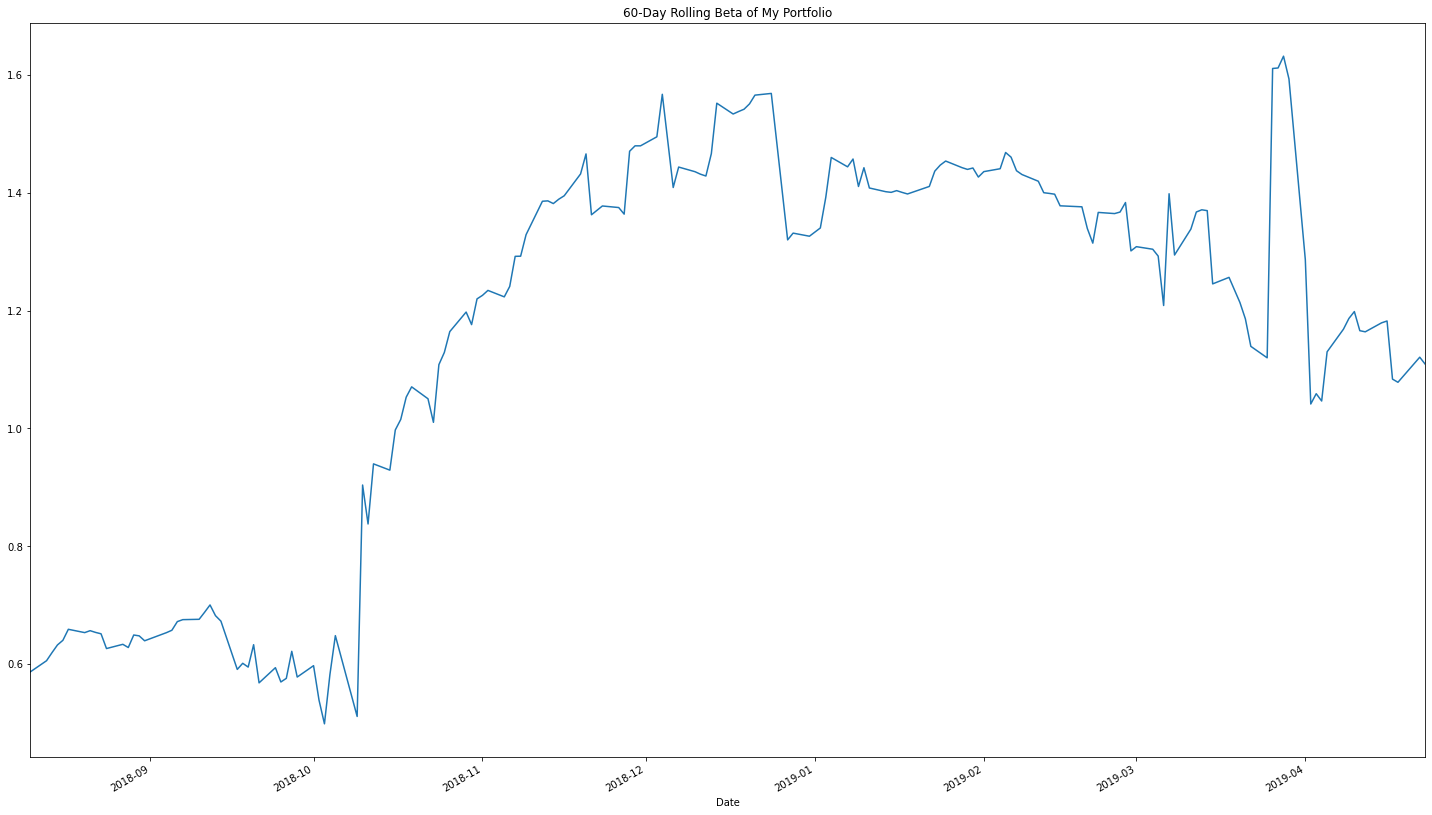

In [125]:
rolling_beta_mp.plot(figsize=(25, 15), title='60-Day Rolling Beta of My Portfolio')
plt.margins(x=0)

In [126]:
# 5.5 Sharpe Ratios of Combined Portfolios 

# Annualized Sharpe Ratios with assumption of risk-free rate to be zero
annualized_sr_cp1 = combined_pr_1.mean()*232 / (combined_pr_1.std()*np.sqrt(232)).sort_values(ascending=False)
annualized_sr_cp1 

Algo 1                         1.884642
Algo 2                        -0.165136
BERKSHIRE HATHAWAY INC        -0.176053
My Portfolio                   0.532963
PAULSON & CO.INC.             -0.062165
S&P 500                        0.147405
SOROS FUND MANAGEMENT LLC      0.076745
SP 60TSX                       0.384740
TIGER GLOBAL MANAGEMENT LLC   -1.092087
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

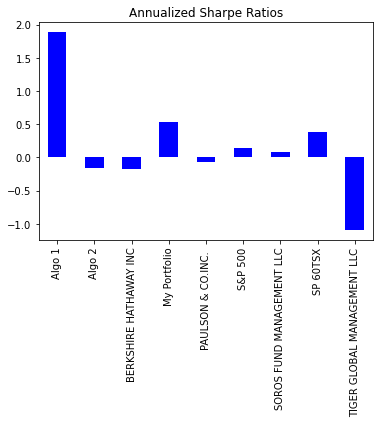

In [127]:
# Sharpe ratios as a bar plot
annualized_sr_cp1.plot(kind = "bar", title = "Annualized Sharpe Ratios", color = 'Blue')

In [128]:
print("6. Commentry: " " My portfolio has third highest annualized standard deviation compared with whale portfolios, Algo 1 & Algo 2 portfolios and SP500 and SP 60TSX. My portfolio  falls on the higher end of the 21-day rolling std scale  above the rolling standard deviation of the S&P 500. My portfolio is 87.2% correlated to SP500 portfolio while the least correlated portfolio to SP500 is Algo 1 with 28.9%. Rolling Beta of my portfolio was calculated for 60 days against SP 60TSX. It appears that most of the period, beta was above 1.0, infering that my portfolio was more sensitive to SP 60TSX movements during that period. Lastly, looking at Sharpe Ratios, Algo 1 outperformed both the market index, SP500 and SP 60 TSX as a whole as well as the Whale Portfolios. My portfolio outperformed all the whale portfolios and market portfolio of SP500 and SP 60 TSX ranking only after Algo 1  portfolio.") 


6. Commentry:  My portfolio has third highest annualized standard deviation compared with whale portfolios, Algo 1 & Algo 2 portfolios and SP500 and SP 60TSX. My portfolio  falls on the higher end of the 21-day rolling std scale  above the rolling standard deviation of the S&P 500. My portfolio is 87.2% correlated to SP500 portfolio while the least correlated portfolio to SP500 is Algo 1 with 28.9%. Rolling Beta of my portfolio was calculated for 60 days against SP 60TSX. It appears that most of the period, beta was above 1.0, infering that my portfolio was more sensitive to SP 60TSX movements during that period. Lastly, looking at Sharpe Ratios, Algo 1 outperformed both the market index, SP500 and SP 60 TSX as a whole as well as the Whale Portfolios. My portfolio outperformed all the whale portfolios and market portfolio of SP500 and SP 60 TSX ranking only after Algo 1  portfolio.
